In [68]:
from Bio.PDB.MMCIFParser import MMCIFParser
from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP
from Bio.PDB import PDBIO

import gzip
import pickle
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from DSSPparser import parseDSSP

import concurrent.futures
import subprocess
import random

import os
import shutil
import gzip
import zipfile
import pickle

import Modules.TORSION2 as TORSION2

from tqdm import tqdm

from concurrent.futures import ThreadPoolExecutor, as_completed
from argparse import ArgumentParser

from scipy.spatial.distance import pdist, squareform

import Modules.CROSSLINK as CROSSLINK
import Modules.TORSION2 as TORSION2
import Modules.UTILLS as UTILLS
import Modules.SOLVENTACC as SOLVENTACC

import warnings
warnings.filterwarnings("ignore")

In [69]:
import os
len(os.listdir('/data/JSG/pdb_mmcif/'))

194429

## TMscore Testing example

In [75]:
native_root = '/home/bis/230711_JSG/230711_JSG_ProteinComplex/231106_Alphalink_bk/240129_CASP14_15_data/native_pdb/'
native_SA_root = '/home/bis/230711_JSG/230711_JSG_ProteinComplex/231106_Alphalink_bk/240129_CASP14_15_data/SA_binned/'
native_pdbs = os.listdir(native_root)

pred_paths = {}
pred_paths['vanila_openfold'] = '/data/jsg_bk/output_dir/predicted_structures/vanila_openfold/'

#pred_paths['renew13'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew13/'
#pred_paths['renew14'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew14/'
#pred_paths['renew15'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew15/'
#pred_paths['renew16'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew16/'
#pred_paths['renew17'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew17/'
#pred_paths['renew18'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew18/'


pred_paths['renew41_neff1'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew41_JSG_neff1/'
pred_paths['renew41_neff10'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew41_JSG_neff10/'
pred_paths['renew41_neff25'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew41_JSG_neff25/'

pred_paths['renew41-f1_neff1'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew41-f1_JSG_neff1/'
pred_paths['renew41-f1_neff10'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew41-f1_JSG_neff10/'
pred_paths['renew41-f1_neff25'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew41-f1_JSG_neff25/'

#pred_paths['renew35_neff1'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew35_JSG_neff1/'
#pred_paths['renew35_neff10'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew35_JSG_neff10/'
#pred_paths['renew35_neff25'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew35_JSG_neff25/'


pred_paths['vanila_openfold_neff1'] = '/data/JSG/240426_output_dir/predicted_structures/vanila_openfold_JSG_neff1/'
pred_paths['vanila_openfold_neff10'] = '/data/JSG/240426_output_dir/predicted_structures/vanila_openfold_JSG_neff10/'
pred_paths['vanila_openfold_neff25'] = '/data/JSG/240426_output_dir/predicted_structures/vanila_openfold_JSG_neff25/'


#pred_paths['renew1-f1_neff1'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew1_JSG_neff1/'
#pred_paths['renew1-f1_neff10'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew1_JSG_neff10/'
#pred_paths['renew1-f1_neff25'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew1_JSG_neff25/'

#pred_paths['renew2-f1_neff1'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew2_JSG_neff1/'
#pred_paths['renew2-f1_neff10'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew2_JSG_neff10/'
#pred_paths['renew2-f1_neff25'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew2_JSG_neff25/'

#pred_paths['renew1-1_neff1'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew1-1_JSG_neff1/'
#pred_paths['renew1-1_neff10'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew1-1_JSG_neff10/'
#pred_paths['renew1-1_neff25'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew1-1_JSG_neff25/'


#pred_paths['1-11-2'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_with_SA_new1-11-2_JSG/'
#pred_paths['renew8'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew8_JSG/'
#pred_paths['renew9-f1_neff1'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew9-f1_JSG_neff1/'
#pred_paths['renew9-f1_neff10'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew9-f1_JSG_neff10/'
#pred_paths['renew9-f1_neff25'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew9-f1_JSG_neff25/'

#pred_paths['renew10']  = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew10_JSG/'
#pred_paths['renew10_neff1']  = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew10_JSG_neff1/'
#pred_paths['renew10_neff10'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew10_JSG_neff10/'
#pred_paths['renew10_neff25'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew10_JSG_neff25/'

#pred_paths['new1-4_200'] = '/data/jsg_bk/output_dir/predicted_structures/JSG_with_SA_new1-4_train_200ea/'
#pred_paths['renew9'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew9_JSG/'
#pred_paths['renew9-f1'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew9-f1_JSG/'


#pred_paths['netsurfp_new1-4_200'] = '/data/JSG/240426_output_dir/predicted_structures/netsurfp_JSG_with_SA_new1-4_JSG/'

reference = list(pred_paths.keys())[-1]
candidates = os.listdir(pred_paths['renew41-f1_neff1'])
pdbs = [] 
for candidate in candidates:
    if candidate.split('_')[0] + '.pdb' not in pdbs and candidate[0] == 'T':
        pdbs.append(candidate.split('_')[0] + '.pdb')


targets = []
for pdb in pdbs:
    if (pdb in pdbs) and (pdb in pdbs):
        targets.append(pdb.split('.')[0])

#targets = ["3hbt_a", "2d4f_a", "3i40_a"]


print(len(targets), targets)
#pred_paths['renew1'] = '/data/JSG/240426_output_dir/predicted_structures/JSG_SA_renew1_JSG/'

43 ['T1121', 'T1137s1', 'T1041', 'T1055', 'T1076', 'T1032', 'T1074', 'T1080', 'T1024', 'T1053', 'T1026', 'T1064', 'T1034', 'T1078', 'T1046s1', 'T1079', 'T1040', 'T1045s2', 'T1028', 'T1037', 'T1065s2', 'T1054', 'T1056', 'T1031', 'T1067', 'T1035', 'T1045s1', 'T1072s1', 'T1030', 'T1099', 'T1046s2', 'T1043', 'T1048', 'T1072s2', 'T1065s1', 'T1057', 'T1033', 'T1025', 'T1038', 'T1050', 'T1039', 'T1058', 'T1042']


In [76]:
tmscores = {}

for model in pred_paths.keys():
    tmscores[model] = {}
    pred_root = pred_paths[model]
    
    for target in targets:
        target_name = target.split('.')[0]
        #if target_name not in targets : continue
    
        native_pdb = os.path.join(native_root, target_name + '.pdb')
        pred_pdb = os.path.join(pred_root, target_name + '_unrelaxed.pdb')
        #pred_pdb = os.path.join(pred_root, target_name.lower() + '_a_unrelaxed.pdb')
        
        #print(native_pdb)
        #print(pred_pdb)
        #TMscore = SOLVENTACC.getTMscore(native_pdb, pred_pdb)
        TMscore = SOLVENTACC.getTMscore(pred_pdb,native_pdb)

        tmscores[model][target_name] = TMscore

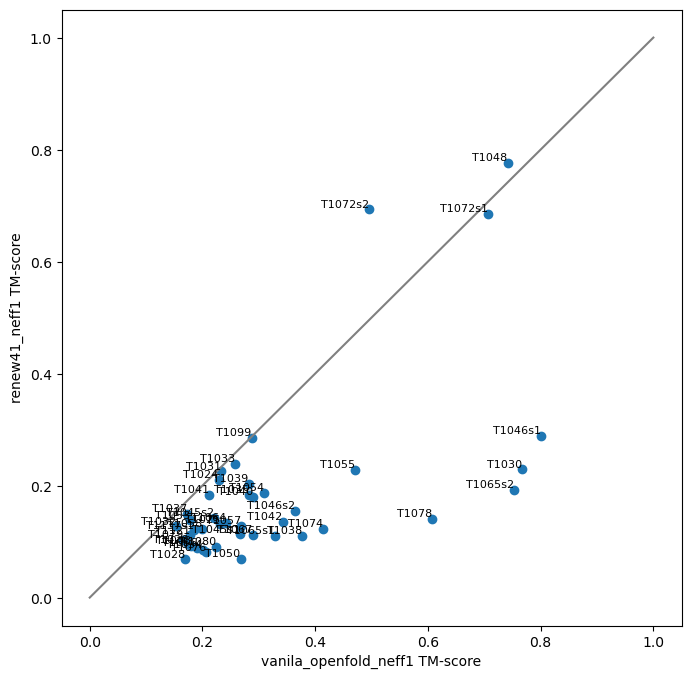

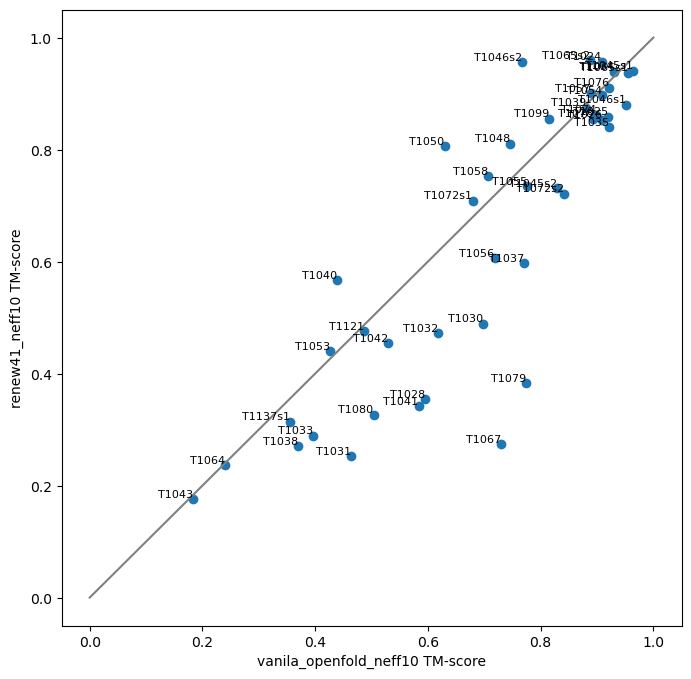

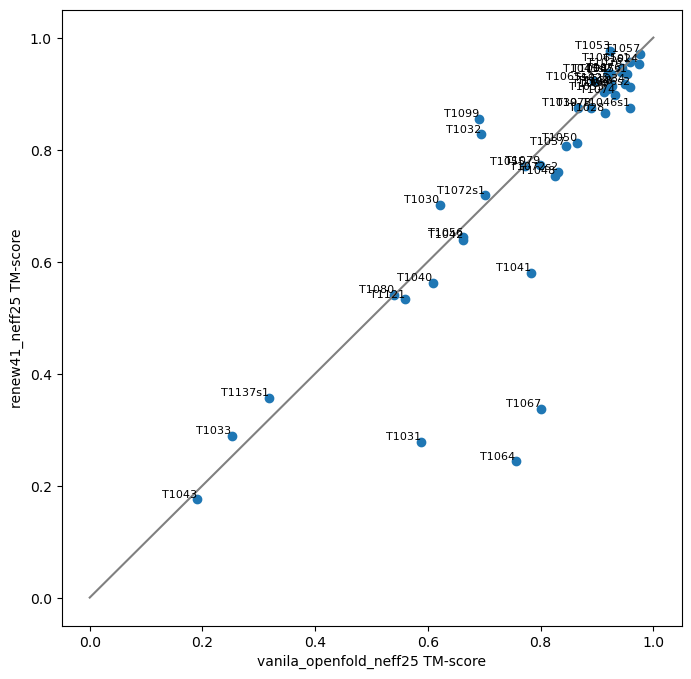

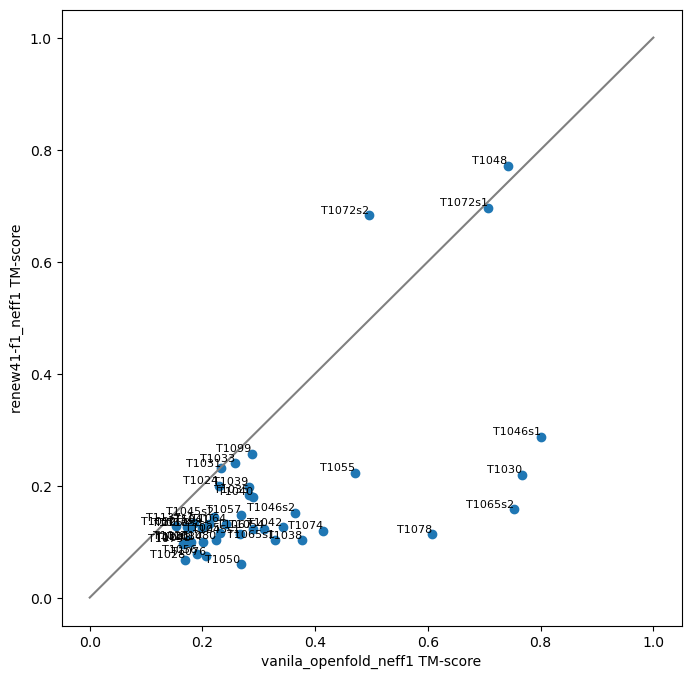

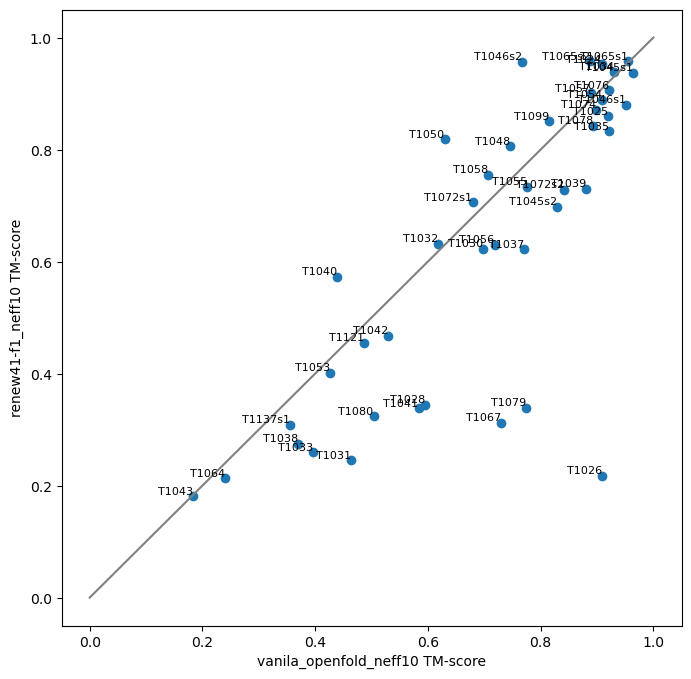

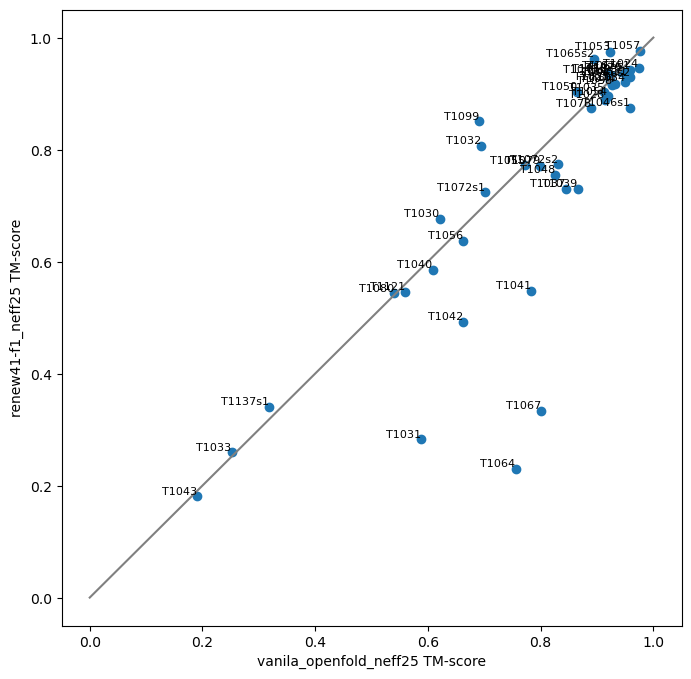

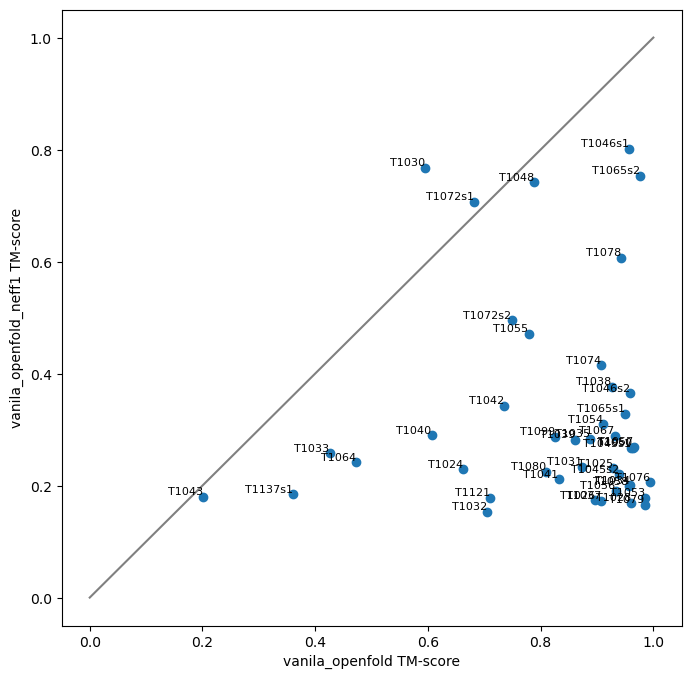

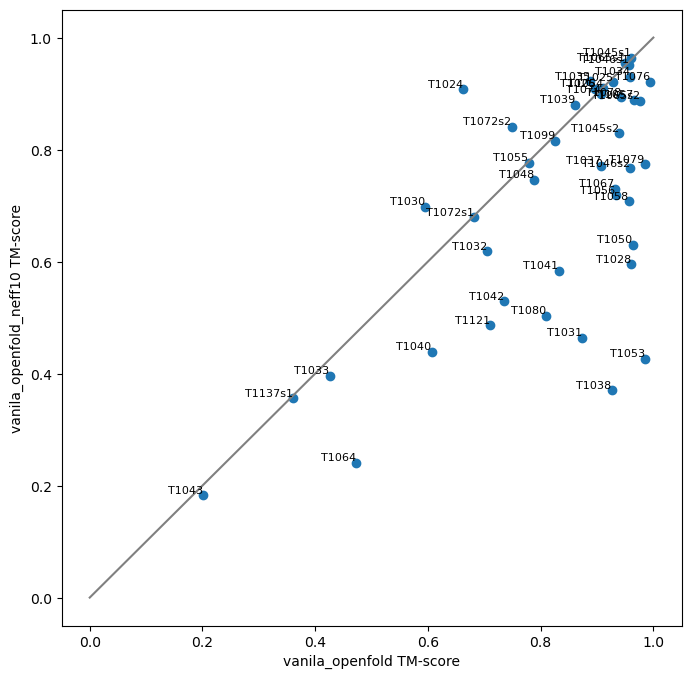

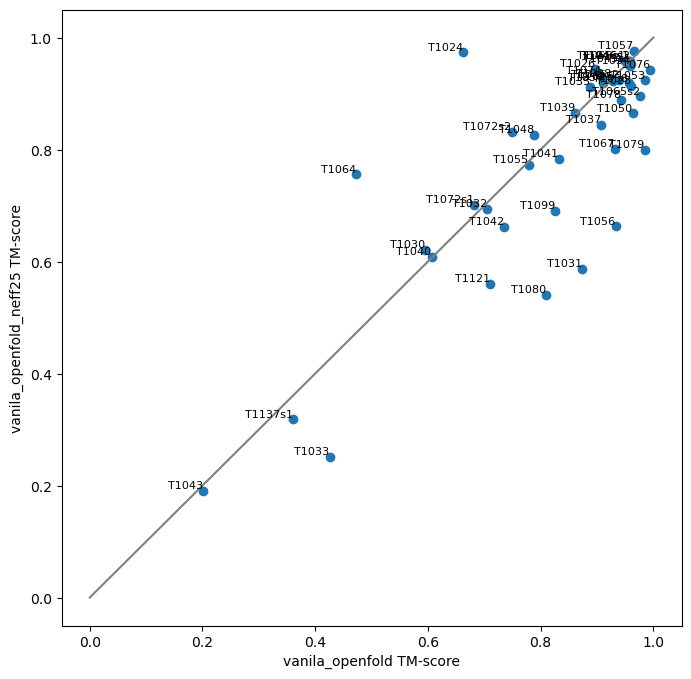

In [77]:
# Scatter plot

for i, model in enumerate(pred_paths.keys()):
    if model == 'vanila_openfold' : continue
    plt.figure(figsize=(8, 8))
    
    marker = 'o'
    
    
    if model.split('_')[-1][:4] != 'neff' or model[0] == 'v':
        plt.scatter(tmscores['vanila_openfold'].values(), tmscores[model].values(), label = model, marker = marker)
        plt.xlabel('vanila_openfold TM-score')
        plt.ylabel(f'{model} TM-score')
        for target_name, x, y in zip(tmscores['vanila_openfold'].keys(), tmscores['vanila_openfold'].values(), tmscores[model].values()):
            plt.text(x, y, target_name, fontsize=8, ha='right', va='bottom')
        
    else : 
        neff = model.split('_')[-1]
        plt.scatter(tmscores[f'vanila_openfold_{neff}'].values(), tmscores[model].values(), label = model, marker = marker)
        plt.xlabel(f'vanila_openfold_{neff} TM-score')
        plt.ylabel(f'{model} TM-score')
        for target_name, x, y in zip(tmscores['vanila_openfold'].keys(), tmscores[f'vanila_openfold_{neff}'].values(), tmscores[model].values()):
            plt.text(x, y, target_name, fontsize=8, ha='right', va='bottom')

    
    plt.plot([0, 1], [0, 1], color='gray')
    
    # Show the plot
#plt.legend()
    plt.show()

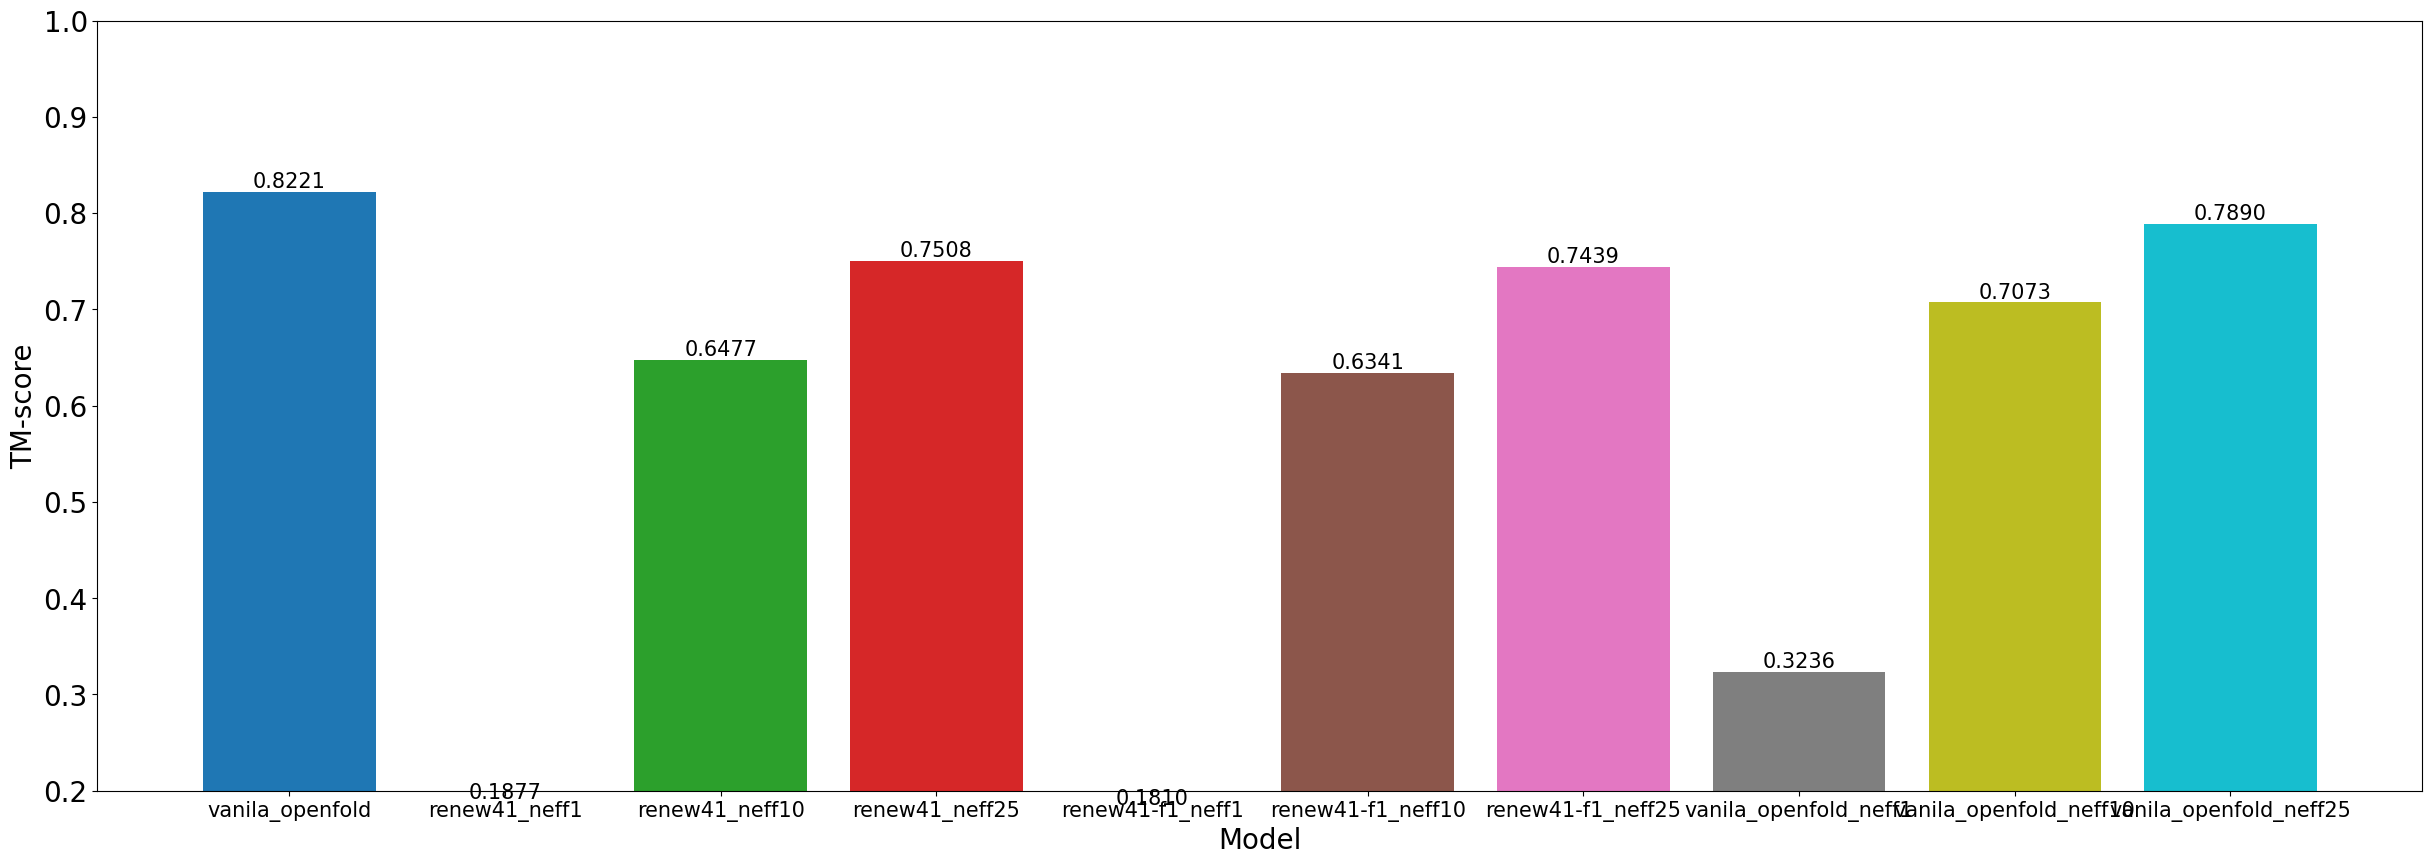

In [78]:
plt.figure(figsize=(30, 10))

for model in tmscores.keys():
    mean_score = np.mean(list(tmscores[model].values()))
    plt.bar(model, mean_score)
    # 각 막대 끝에 해당하는 좌표에 y 축 값 표시
    plt.text(model, mean_score, f'{mean_score:.4f}', ha='center', va='bottom', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=20)

plt.xlabel('Model', size=20)
plt.ylabel('TM-score', size=20)
plt.ylim(0.2,1.0)
plt.show()